In [19]:
#imports
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose


In [20]:
# Creating dataframe
df = pd.ExcelFile('./datafile.xlsx')
df=pd.read_excel(df,'Business Insider')
df_daily = df.drop(columns =['Unnamed: 4','Year Month', 'Recirc Bullet Clicks.1',
              'Back to Homepage Button Clicks.1', 'Homepage Visits.1'])
df_monthly = df.drop(columns = ['Date', 'Recirc Bullet Clicks',
                     'Back to Homepage Button Clicks', 'Homepage Visits', 'Unnamed: 4'])
df = pd.read_excel('./datafile.xlsx')

In [21]:
# checking my work
df.head()

,Date,Recirc Bullet Clicks,Back to Homepage Button Clicks,Homepage Visits,Unnamed: 4,Year Month,Recirc Bullet Clicks.1,Back to Homepage Button Clicks.1,Homepage Visits.1
0,2020-04-01,20627,44615,248276,NaN,202004.0,719289.0,1349782.0,7118246.0
1,2020-04-02,16526,44506,238766,NaN,202005.0,393781.0,1115152.0,6873482.0
2,2020-04-03,25451,51876,246898,NaN,202006.0,324121.0,929110.0,6575540.0
3,2020-04-04,26733,59423,201253,NaN,202007.0,371023.0,1126343.0,6595723.0
4,2020-04-05,21590,57252,204265,NaN,202008.0,316378.0,788906.0,6356311.0


In [22]:
# splitting the dataframe into 2
df_daily = df.drop(columns =['Unnamed: 4','Year Month', 'Recirc Bullet Clicks.1',
              'Back to Homepage Button Clicks.1', 'Homepage Visits.1'])
df_monthly = df.drop(columns = ['Date', 'Recirc Bullet Clicks',
                     'Back to Homepage Button Clicks', 'Homepage Visits', 'Unnamed: 4'])

In [23]:
# checking my work
df_daily.head()

,Date,Recirc Bullet Clicks,Back to Homepage Button Clicks,Homepage Visits
0,2020-04-01,20627,44615,248276
1,2020-04-02,16526,44506,238766
2,2020-04-03,25451,51876,246898
3,2020-04-04,26733,59423,201253
4,2020-04-05,21590,57252,204265


In [24]:
# checking my work
df_monthly

,Year Month,Recirc Bullet Clicks.1,Back to Homepage Button Clicks.1,Homepage Visits.1
0,202004.0,719289.0,1349782.0,7118246.0
1,202005.0,393781.0,1115152.0,6873482.0
2,202006.0,324121.0,929110.0,6575540.0
3,202007.0,371023.0,1126343.0,6595723.0
4,202008.0,316378.0,788906.0,6356311.0
...,...,...,...,...
297,NaN,NaN,NaN,NaN
298,NaN,NaN,NaN,NaN
299,NaN,NaN,NaN,NaN
300,NaN,NaN,NaN,NaN


In [25]:
# removing NA Values
df_monthly.dropna(inplace=True)

In [26]:
df_monthly

,Year Month,Recirc Bullet Clicks.1,Back to Homepage Button Clicks.1,Homepage Visits.1
0,202004.0,719289.0,1349782.0,7118246.0
1,202005.0,393781.0,1115152.0,6873482.0
2,202006.0,324121.0,929110.0,6575540.0
3,202007.0,371023.0,1126343.0,6595723.0
4,202008.0,316378.0,788906.0,6356311.0
5,202009.0,270870.0,509483.0,5741681.0
6,202010.0,248917.0,773123.0,5875682.0
7,202011.0,287396.0,959915.0,6107586.0
8,202012.0,272136.0,840974.0,5597517.0
9,202101.0,416109.0,882344.0,5922670.0


In [27]:
# converting to datetime data type

df_monthly['Year Month'] = '2020/04','2020/05','2020/06','2020/07','2020/08','2020/09','2020/10','2020/11','2020/12','2021/01'

df_monthly['Year Month'] = pd.to_datetime(df_monthly['Year Month'],yearfirst=True)

df_monthly

,Year Month,Recirc Bullet Clicks.1,Back to Homepage Button Clicks.1,Homepage Visits.1
0,2020-04-01,719289.0,1349782.0,7118246.0
1,2020-05-01,393781.0,1115152.0,6873482.0
2,2020-06-01,324121.0,929110.0,6575540.0
3,2020-07-01,371023.0,1126343.0,6595723.0
4,2020-08-01,316378.0,788906.0,6356311.0
5,2020-09-01,270870.0,509483.0,5741681.0
6,2020-10-01,248917.0,773123.0,5875682.0
7,2020-11-01,287396.0,959915.0,6107586.0
8,2020-12-01,272136.0,840974.0,5597517.0
9,2021-01-01,416109.0,882344.0,5922670.0


In [28]:
df_monthly.describe()

,Recirc Bullet Clicks.1,Back to Homepage Button Clicks.1,Homepage Visits.1
count,10.000000,1.000000e+01,1.000000e+01
mean,362002.000000,9.275132e+05,6.276444e+06
std,137406.365079,2.312843e+05,5.081616e+05
min,248917.000000,5.094830e+05,5.597517e+06
25%,275951.000000,8.019230e+05,5.887429e+06
50%,320249.500000,9.057270e+05,6.231948e+06
75%,388091.500000,1.076343e+06,6.590677e+06
max,719289.000000,1.349782e+06,7.118246e+06


In [29]:
df_daily.describe()

,Recirc Bullet Clicks,Back to Homepage Button Clicks,Homepage Visits
count,302.000000,302.000000,302.000000
mean,11986.821192,30712.357616,207829.264901
std,6892.233544,9790.678921,34003.542035
min,5381.000000,0.000000,121506.000000
25%,8328.750000,24848.000000,184827.500000
50%,10437.000000,29417.000000,206073.000000
75%,13197.250000,36800.750000,230638.500000
max,67462.000000,60079.000000,302559.000000


# Time Series Data
#### Monthly

In [30]:
# removing NA Values
df_monthly.dropna(inplace=True)

In [31]:
# converting to datetime data type

df_monthly['Year Month'] = '2020/04','2020/05','2020/06','2020/07','2020/08','2020/09','2020/10','2020/11','2020/12','2021/01'

df_monthly['Year Month'] = pd.to_datetime(df_monthly['Year Month'],yearfirst=True)

df_monthly

,Year Month,Recirc Bullet Clicks.1,Back to Homepage Button Clicks.1,Homepage Visits.1
0,2020-04-01,719289.0,1349782.0,7118246.0
1,2020-05-01,393781.0,1115152.0,6873482.0
2,2020-06-01,324121.0,929110.0,6575540.0
3,2020-07-01,371023.0,1126343.0,6595723.0
4,2020-08-01,316378.0,788906.0,6356311.0
5,2020-09-01,270870.0,509483.0,5741681.0
6,2020-10-01,248917.0,773123.0,5875682.0
7,2020-11-01,287396.0,959915.0,6107586.0
8,2020-12-01,272136.0,840974.0,5597517.0
9,2021-01-01,416109.0,882344.0,5922670.0


In [32]:
#converting date time to index + dropping extra column
df_monthly.index = df_monthly['Year Month']
df_monthly.drop(columns='Year Month')

,Recirc Bullet Clicks.1,Back to Homepage Button Clicks.1,Homepage Visits.1
Year Month,,,
2020-04-01,719289.0,1349782.0,7118246.0
2020-05-01,393781.0,1115152.0,6873482.0
2020-06-01,324121.0,929110.0,6575540.0
2020-07-01,371023.0,1126343.0,6595723.0
2020-08-01,316378.0,788906.0,6356311.0
2020-09-01,270870.0,509483.0,5741681.0
2020-10-01,248917.0,773123.0,5875682.0
2020-11-01,287396.0,959915.0,6107586.0
2020-12-01,272136.0,840974.0,5597517.0


In [47]:
df_monthly.corr()

,Recirc Bullet Clicks.1,Back to Homepage Button Clicks.1,Homepage Visits.1
Recirc Bullet Clicks.1,1.000000,0.780932,0.725894
Back to Homepage Button Clicks.1,0.780932,1.000000,0.827277
Homepage Visits.1,0.725894,0.827277,1.000000


## Monthly - Plots

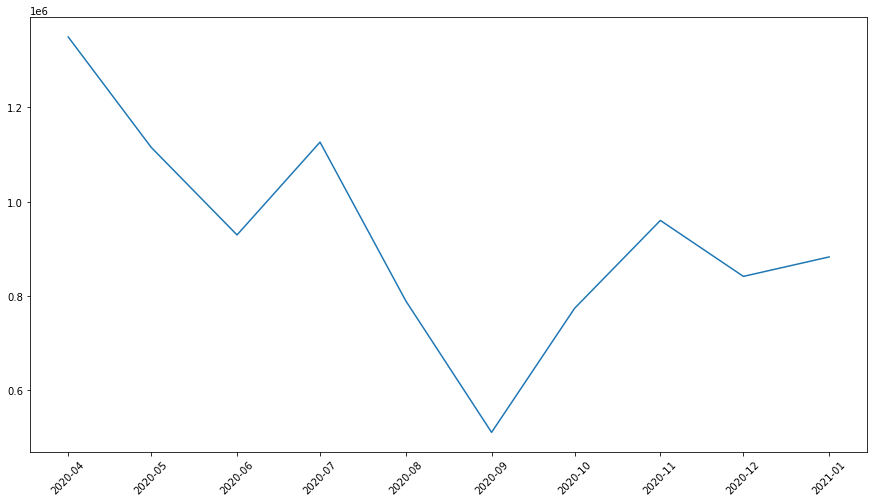

In [34]:
plt.figure(figsize = (15,8))
plt.plot(df_monthly['Back to Homepage Button Clicks.1'])
plt.xticks(rotation = 45);

In [35]:
#The Back to Homepage button usage fell drastically between July 2020 and September 2020

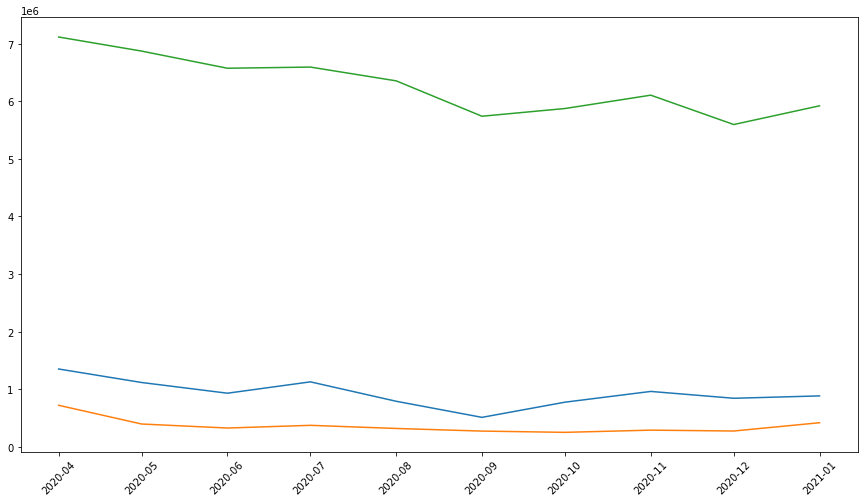

In [36]:
plt.figure(figsize = (15,8))
plt.plot(df_monthly[['Back to Homepage Button Clicks.1','Recirc Bullet Clicks.1','Homepage Visits.1']])
plt.xticks(rotation = 45);

In [37]:
#Homepage visits and back to home page clicks have similar patterns (understandably)

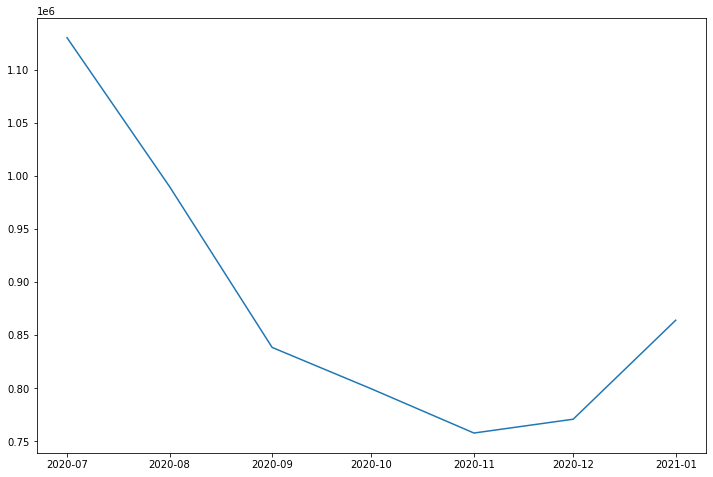

In [38]:
#Plot over time + rolling average (4 weeks)

plt.figure(figsize=(12,8))
plt.plot(df_monthly['Back to Homepage Button Clicks.1'].rolling(4).mean())

# Time Series Data
#### Daily

In [39]:
df_daily['Date'] = pd.to_datetime(df_daily['Date'])
df_daily.index = df_daily['Date']
df_daily.drop(columns = 'Date', inplace=True)
df_daily

,Recirc Bullet Clicks,Back to Homepage Button Clicks,Homepage Visits
Date,,,
2020-04-01,20627,44615,248276
2020-04-02,16526,44506,238766
2020-04-03,25451,51876,246898
2020-04-04,26733,59423,201253
2020-04-05,21590,57252,204265
...,...,...,...
2021-01-23,22381,39903,239691
2021-01-24,27380,51785,243072
2021-01-25,16324,36663,236920


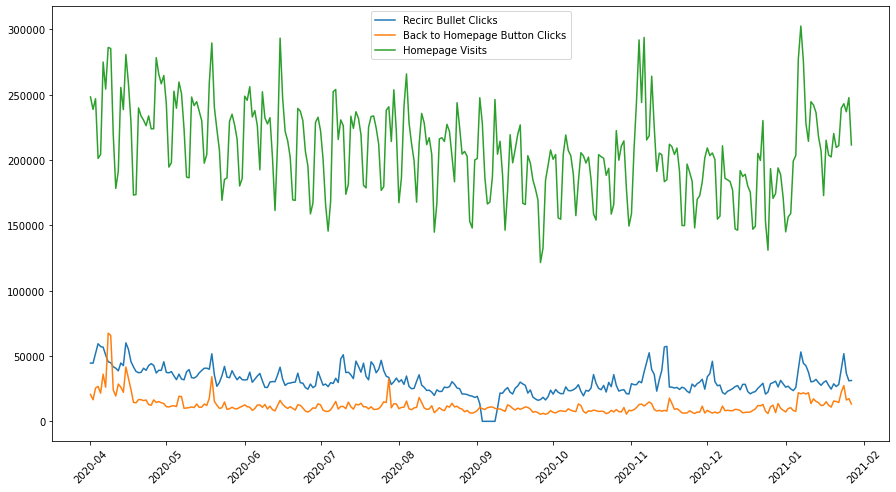

In [40]:
#plotting homepage button clicks
plt.figure(figsize = (15,8))
plt.plot(df_daily[['Back to Homepage Button Clicks','Recirc Bullet Clicks','Homepage Visits']])
plt.legend(df_daily)
plt.xticks(rotation = 45);

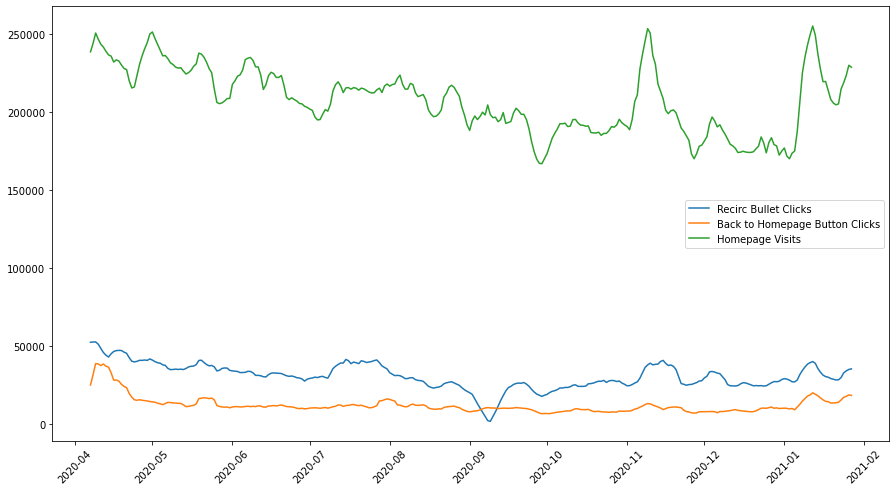

In [41]:
#plotting daily rolling average using 7 day lag
#this shows the average of every 7 days, aka a weekly average
plt.figure(figsize = (15,8))
plt.plot(df_daily[['Back to Homepage Button Clicks','Recirc Bullet Clicks','Homepage Visits']].rolling(7).mean())
plt.legend(df_daily)
plt.xticks(rotation = 45);

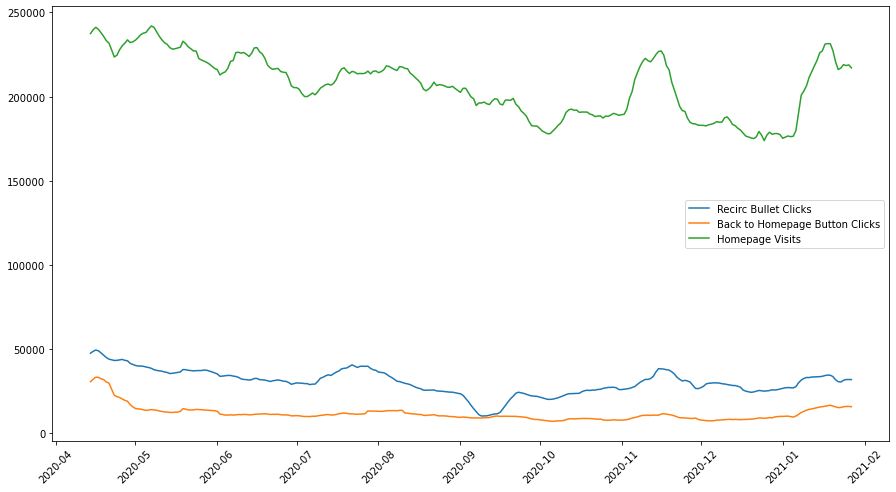

In [42]:
#plotting daily rolling average using 14 day lag
#this shows the average of every 14 days, aka a bi-weekly average
plt.figure(figsize = (15,8))
plt.plot(df_daily[['Back to Homepage Button Clicks','Recirc Bullet Clicks','Homepage Visits']].rolling(14).mean())
plt.legend(df_daily)
plt.xticks(rotation = 45);

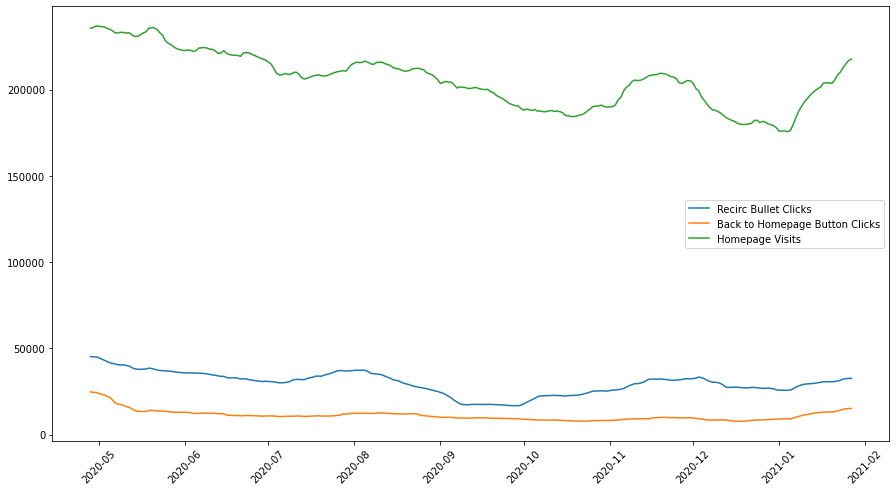

In [43]:
#plotting daily rolling average using 28 day lag
#this shows the average of every 28 days, aka a monthly average
plt.figure(figsize = (15,8))
plt.plot(df_daily[['Back to Homepage Button Clicks','Recirc Bullet Clicks','Homepage Visits']].rolling(28).mean())
plt.legend(df_daily)
plt.xticks(rotation = 45);

In [44]:
# Correlation Data

In [57]:
df_daily.corr()

,Recirc Bullet Clicks,Back to Homepage Button Clicks,Homepage Visits
Recirc Bullet Clicks,1.000000,0.540274,0.534565
Back to Homepage Button Clicks,0.540274,1.000000,0.432842
Homepage Visits,0.534565,0.432842,1.000000


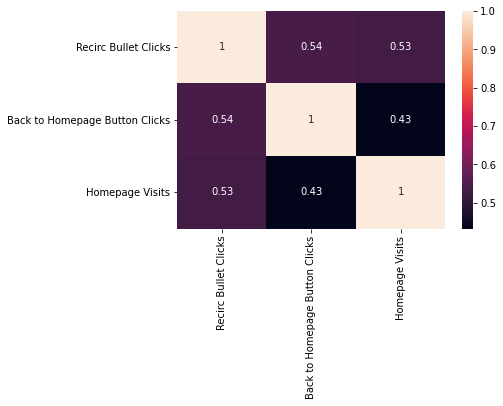

In [56]:
#finding correlation between the numbers
sns.heatmap(df_daily.corr(), annot=True);

In [54]:
df_monthly.corr()

,Recirc Bullet Clicks.1,Back to Homepage Button Clicks.1,Homepage Visits.1
Recirc Bullet Clicks.1,1.000000,0.780932,0.725894
Back to Homepage Button Clicks.1,0.780932,1.000000,0.827277
Homepage Visits.1,0.725894,0.827277,1.000000


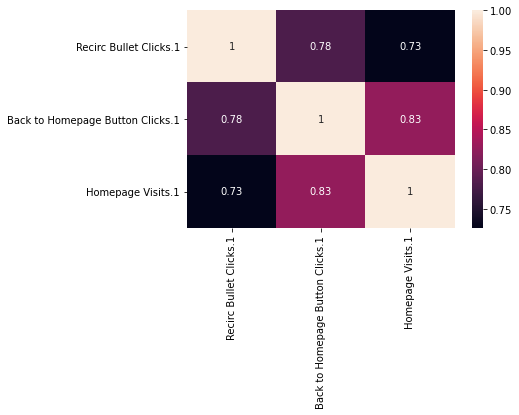

In [48]:
sns.heatmap(df_monthly.corr(), annot=True);

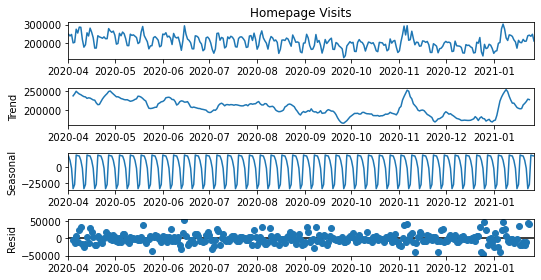

In [51]:
decomp = seasonal_decompose(df_daily['Homepage Visits'])

decomp.plot().set_figwidth(8);